### **1. Prepare the well-known dataset for hand-written digits (MNIST) and flowers (IRIS)**

In [426]:
import sklearn.datasets as dataset
mnist = dataset.fetch_openml('mnist_784')
iris = dataset.load_iris()



> A. Use python library to extract images



mnist data shape :  (70000, 784)
mnist target shape :  (70000,)
iris data shape :  (150, 4)
iris target shape :  (150,)


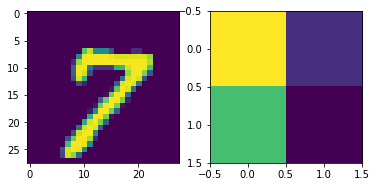

In [373]:
import numpy as np
import matplotlib.pyplot as plt

mnist_data = mnist.data
mnist_target = mnist.target
print('mnist data shape : ',mnist_data.shape)
print('mnist target shape : ',mnist_target.shape)

iris_data = iris.data
iris_target = iris.target
print('iris data shape : ', iris_data.shape)
print('iris target shape : ', iris_target.shape)

random_index = np.random.choice(70000,1)
mnist_sample = mnist_data[random_index].reshape(28,28)
random_index = np.random.choice(150,1)
iris_sample = iris_data[random_index].reshape(2,2)
plt.subplot(1,2,1)
plt.imshow(mnist_sample)
plt.subplot(1,2,2)
plt.imshow(iris_sample)



> B. Separate them into test and training set



In [375]:
# 두 가지 구분 (setosa, versicolor (virginica는 무시))
iris1 = iris.data[:50] # setosa
iris2 = iris.data[50:100] # versicolor

# Train/Test Separate (100개중 80개는 train 20개는 test)
iris_trainsize = 40 
iris_testsize = 10

iris_train = np.zeros([2 * iris_trainsize, 5])
iris_train[:iris_trainsize, :4] = iris1[:iris_trainsize] # setosa 40개 
iris_train[iris_trainsize:, :4] = iris2[:iris_trainsize] # versicolor 40개
iris_train[:iris_trainsize,4] = 1
iris_train[iris_trainsize:,4] = -1

iris_test = np.zeros([2 * iris_testsize, 4])
iris_test[:iris_testsize, :4] = iris1[iris_trainsize:] # setosa 10개 
iris_test[iris_testsize:, :4] = iris2[iris_trainsize:] # versicolor 10개

mnist_train = mnist_data[:60000]
mnist_test = mnist_data[60000:]

### **2. Design a feed-forward single layer perceptron (SLP), and check the classification accuracy with random weights**

In [429]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def SLP(IRIS_dataset,weight):
    bias = 1
    node = sigmoid(IRIS_dataset @ weight + bias) # Forward & sigmoid Function
    if (node > 0.5) :
        y = 1
    else :
        y = -1
    return y
weight = np.random.randn(4,1) # random 가중치 ([4,1])
iris_accuracy = 0
for i in range(iris_train.shape[0]):
    y = SLP(iris_train[i,:4],weight)
    if (y == iris_train[i,4] ) :
        iris_accuracy += 1
print("iris_accuracy = ", iris_accuracy,"/",iris_train.shape[0])

iris_accuracy =  62 / 80


### **3. Design a feed-forward multilayer perceptron (MLP), and check the classification accuracy with random weights**

In [431]:
def softmax(x):
    exp_x = np.exp(x - np.max(x)) # overflow 방지
    return (exp_x / np.sum(exp_x))
def MLP(MNIST_dataset,w1,w2):
    bias1 = np.ones([1, 120])
    hidden = sigmoid(MNIST_dataset @ w1 + bias1) # hidden node (1, 120)
    
    bias2 = np.ones([1, 10])
    output = np.array(softmax(hidden @ w2 + bias2)) # softmax로 치환

    return output
weight1 = np.random.randn(784,120) # u
weight2 = np.random.randn(120,10) # v
mnist_accuracy = 0
for i in range(mnist_train.shape[0]):
    y = MLP(mnist_train[i],weight1,weight2)
    if (y.argmax() == int(mnist_target[i])):
        mnist_accuracy += 1
print("mnist_accuracy = ", mnist_accuracy,"/",mnist_train.shape[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(1, 10)
mnist_accuracy =  6244 / 60000


In [432]:
print("mnist_accuracy = ", mnist_accuracy,"/",mnist_train.shape[0])

mnist_accuracy =  6244 / 60000
